In [89]:
from numba import jit,vectorize
from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['text.usetex'] = True
import random
import matplotlib.cm as cm           # import colormap stuff!

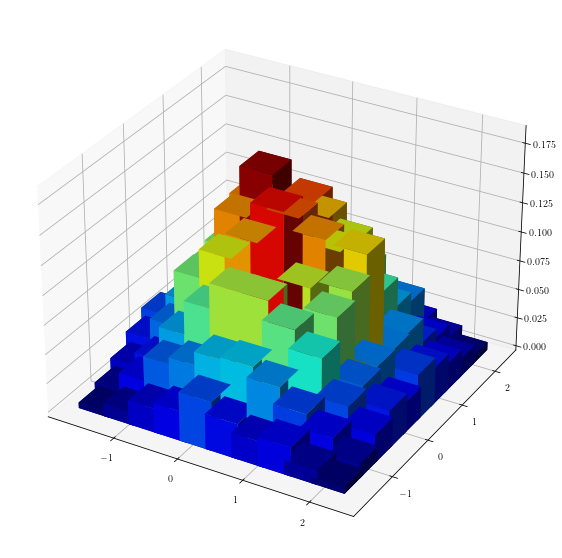

In [98]:
# Fixing random state for reproducibility
np.random.seed(1)

n=10000
vec1=np.random.random_sample((n,))
vec2=np.random.random_sample((n,))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

x, y = np.sqrt(-2*np.log(vec1))*np.cos(2*np.pi*vec2),np.sqrt(-2*np.log(vec1))*np.sin(2*np.pi*vec2)

hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[-2, 2], [-2, 2]],density=1)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
cmap = cm.get_cmap('jet') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)

# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color=rgba ,zsort='average',shade=True)
plt.savefig('gauss3d.png', dpi=200)
plt.show()

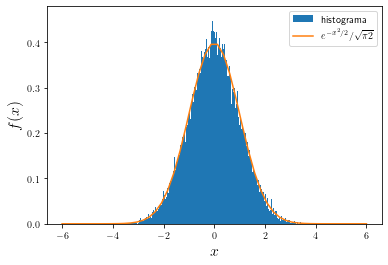

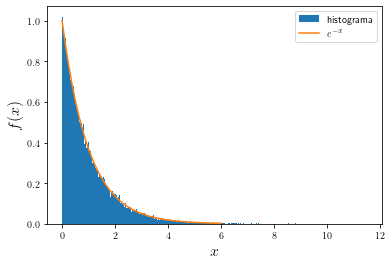

In [91]:
#quantidade de numero aletorios
n=100000

#numero aletorios uniformes
vec=np.random.random_sample((n,))
ang=np.random.random_sample((n,))

#transformando o numero aleatorio

aux2=-np.log(vec)#exponencial
aux1=np.sqrt(-2*np.log(vec))*np.cos(2*np.pi*ang)#gauss

#plotar os gráficos

#gauss
x=np.linspace(-6,6)

plt.ylabel("$f(x)$ ", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.xlabel('$x$', 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})


plt.hist(aux1,1000,density=1,label='histograma')
plt.plot(x,np.exp(-x**2/2)/np.sqrt(np.pi*2),label='$e^{-x^2/2}/\sqrt{\pi 2}$')
plt.legend()
plt.savefig('gauss.png', dpi=200)

plt.show()

#exponencial
x=np.linspace(0,6)

plt.ylabel("$f(x)$ ", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.xlabel('$x$', 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})

plt.hist(aux2,1000,density=1,label='histograma')
plt.plot(x,np.exp(-x),label='$e^{-x}$')
plt.legend()
plt.savefig('expo.png', dpi=200)

plt.show()

In [92]:
def verification(vec):
    if len(vec)==1:
        return 1
    for i in prange(len(vec)-1):
        if(vec[i]*vec[i+1]==1):
            return 0
    return 1   

In [93]:
def sequenci(ntot,n,p):
    soma=0
    for j in prange(ntot):
        vec=[]
        for i in prange(n):
            a=random.random()
            #print(a)
            if (a<=p):
                vec.append(1)
            else:
                vec.append(0)
        #print(vec)
        soma+=verification(vec)
    return soma/ntot

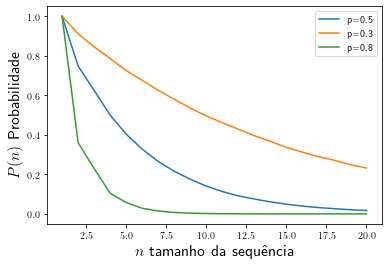

In [94]:
n=np.linspace(1,20,20)
lista1=[]
lista2=[]
lista3=[]
#gerando as probabilidades
for i in n:
    lista1.append(sequenci(100000,int(i),0.5))
    lista2.append(sequenci(100000,int(i),0.3))
    lista3.append(sequenci(100000,int(i),0.8))
    
plt.plot(n,lista1,label='p=0.5')
plt.plot(n,lista2,label='p=0.3')
plt.plot(n,lista3,label='p=0.8')
plt.ylabel("$P(n)$ Probabilidade ", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.xlabel('$n$ tamanho da sequência', 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.legend()
plt.savefig('18.png', dpi=200)
plt.show()

In [95]:
def verification2(vec):
    if(np.sum(vec)%2==1):
        return 0
    return 1   

In [96]:
def sequenci2(ntot,n,p):
    soma=0
    for j in prange(ntot):
        vec=[]
        for i in prange(n):
            a=random.random()
            #print(a)
            if (a<=p):
                vec.append(1)
            else:
                vec.append(0)
        #print(vec)
        soma+=verification2(vec)
    return soma/ntot

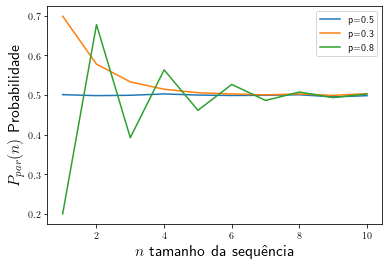

In [97]:
n=np.linspace(1,10,10)
lista1=[]
lista2=[]
lista3=[]
#gerando as probabilidades
for i in n:
    lista1.append(sequenci2(100000,int(i),0.5))
    lista2.append(sequenci2(100000,int(i),0.3))
    lista3.append(sequenci2(100000,int(i),0.8))
    
plt.plot(n,lista1,label='p=0.5')
plt.plot(n,lista2,label='p=0.3')
plt.plot(n,lista3,label='p=0.8')
plt.ylabel("$P_{par}(n)$ Probabilidade ", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.xlabel('$n$ tamanho da sequência', 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16})
plt.legend()
plt.savefig('19.png', dpi=200)
plt.show()